In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use("seaborn")
plt.rc('figure', figsize=(10, 10))

# Task 1
## $y' = 0.418(x^2 + \sin{1.2x}) + 1.344y\\y(0.2)=0.5$
## Analytical solution
#### $y = -0.311(x^2 + 1.4881x + 1.1072 + 0.4968(\cos(1.2x) + 1.12\sin(1.2x)) + ce^{1.344x}\\
    c = 0.87171695329255516$

In [3]:
def y(x):
    c = 0.87171695329255516
    return -0.311 * \
            (x**2 + 1.4881*x + 1.1072 + \
            0.4968*(np.cos(1.2*x) + 1.12*np.sin(1.2*x))) + \
            c*np.e**(1.344*x)

## Euler method

In [4]:
def euler(fty, a, b, τ, y0):
    """Compute approximate numeric solution 
    of ordinary differential equation y'=f(t, y)
    using the Euler method
    """
    t = np.arange(a, b+τ, τ)
    y = [y0]
    for i, ti in enumerate(t):
        y.append(y[i] + τ*fty(ti, y[i]))
    return t, np.array(y[:-1])

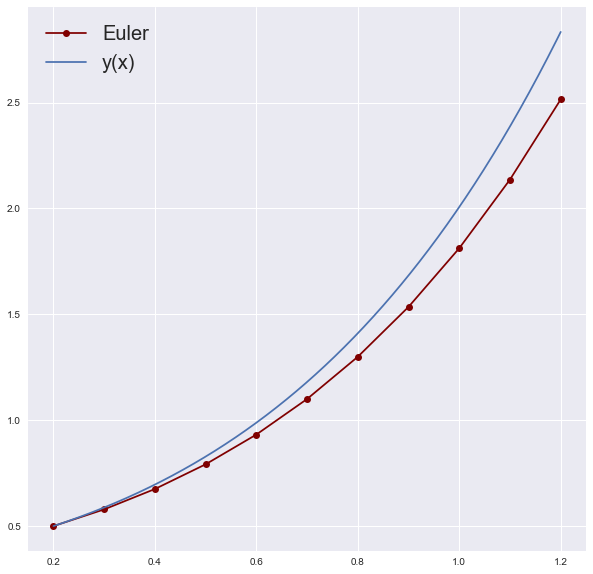

In [7]:
def dy(x, y): 
    return 0.418*(x**2 + np.sin(1.2*x)) + 1.344*y

A = 0.2
B = 1.2
y0 = 0.5
τ = 0.1

coords = euler(dy, A, B, τ, y0)

X = np.linspace(A, B, 1000)

plt.plot(coords[0], coords[1], '-o', c='maroon', label="Euler")
plt.plot(X, y(X), label="y(x)")
plt.legend(fontsize=20)

plt.show()

# Task 2
## $y' = x + \cos{\frac{y}{\sqrt{7}}}$
## Runge–Kutta method

In [8]:
def runge_kutta(fty, a, b, τ, y0, n):
    """Compute approximate numeric solution 
    of ordinary differential equation y'=f(t, y)
    using the n-order Runge-Kutta method
    """
    t = np.arange(a, b+τ, τ)
    y = [y0]
    k1, k2, k3, k4 = 0, 0, 0, 0
    if n == 2:
        for i, ti in enumerate(t):
            k1 = fty(ti, y[i])
            k2 = fty(ti + τ, y[i] + τ*k1)
            y.append(y[i] + τ/2*(k1+k2))
    elif n == 3:
        for i, ti in enumerate(t):
            k1 = fty(ti, y[i])
            k2 = fty(ti + τ/2, y[i] + τ*k1/2)
            k3 = fty(ti + τ, y[i] - τ*k1 + 2*k2*τ)

            y.append(y[i] + τ/6*(k1 + 4*k2 + k3))
    elif n == 4:
        for i, ti in enumerate(t):
            k1 = fty(ti, y[i])
            k2 = fty(ti + τ/2, y[i] + τ*k1/2)
            k3 = fty(ti + τ/2, y[i] + τ*k2/2)
            k4 = fty(ti + τ, y[i] + τ*k3)

            y.append(y[i] + τ/6*(k1 + 2*(k2+k3) + k4))     
    else:
        raise ValueError("The method with this order isn't implemented")
    return t, np.array(y[:-1])

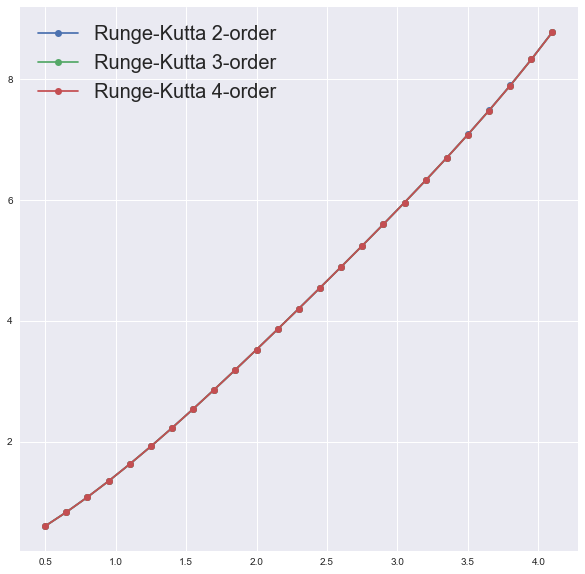

In [11]:
def dy2(x, y):
    return x + np.cos(y/np.sqrt(7))

A2 = 0.5
B2 = 4.1 
y0_2 = 0.6
τ2 = 0.15
t = np.arange(a, b+τ, τ)

rk_coords = [runge_kutta(dy2, A2, B2, τ2, y0_2, i) for i in [2, 3, 4]]

for i, coords in enumerate(rk_coords):
    plt.plot(*coords, '-o', label=f"Runge-Kutta {i+2}-order")

plt.legend(fontsize=20)

## Errors

In [13]:
for i in [2, 3, 4]:
    print(f"{i}-order errors:")
    print((runge_kutta(dy2, A2, B2, τ2/2, y0_2, i)[1][::2] 
           - rk_coords[i-2][1]) 
          / (2**i - 1))

2-order errors:
[  0.00000000e+00   7.47015690e-06   1.51243408e-05   2.30566384e-05
   3.12642874e-05   3.95960094e-05   4.77142834e-05   5.50827394e-05
   6.09846252e-05   6.45706556e-05   6.49271268e-05   6.11505799e-05
   5.24148952e-05   3.80201645e-05   1.74184001e-05  -9.78289257e-06
  -4.38335001e-05  -8.48609085e-05  -1.32888180e-04  -1.87838480e-04
  -2.49514615e-04  -3.17540132e-04  -3.91245260e-04  -4.69476362e-04
  -5.50302888e-04]
3-order errors:
[  0.00000000e+00   5.45612616e-07   1.07378956e-06   1.56215753e-06
   1.99027746e-06   2.34207536e-06   2.60783170e-06   2.78527379e-06
   2.87949529e-06   2.90169571e-06   2.86699968e-06   2.79179372e-06
   2.69105947e-06   2.57609562e-06   2.45285561e-06   2.32094988e-06
   2.17322182e-06   1.99573394e-06   1.76800010e-06   1.46336447e-06
   1.04955373e-06   4.89622585e-07  -2.56198244e-07  -1.22681480e-06
  -2.45319459e-06]
4-order errors:
[  0.00000000e+00   2.82071377e-09   4.86569056e-09   6.07564972e-09
   6.45885794e-09